In [41]:
import os, sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
aa = ["A", "C", "D", "E", "F", "G", "H",  "I",  "K",  "L",  "M",  "N", "P", "Q", "R", "S", "T", "V",  "W", "Y"]

20

In [10]:
pos1 = "0 	0 	0 	0 	0 	0 	0 	0 	0 	0 	770225 	0 	0 	0 	0 	0 	0 	0 	0 	0 "
pos1 = pos1.strip().split()
pos1 = [int(x) for x in pos1]
pos1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 770225, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
pos2 = "61636 	28122 	18576 	32583 	18059 	84093 	14563 	16009 	27209 	67225 	22518 	13856 	34188 	22720 	88940 	77500 	33710 	54384 	33775 	20559"
pos2 = pos2.strip().split()
pos2 = [int(x) for x in pos2]

In [12]:
pos3 = "61459 	27347 	18087 	30214 	17064 	89076 	15204 	16206 	23437 	72245 	24017 	14233 	38299 	21127 	89977 	63308 	32553 	63685 	36756 	15931"
pos3 = pos3.strip().split()
pos3 = [int(x) for x in pos3]


In [13]:
pos4 = "59092 	27858 	18296 	30689 	17154 	94163 	14887 	16276 	24225 	70814 	24490 	13709 	29486 	21902 	93981 	61558 	31086 	66024 	38257 	16278"
pos4 = pos4.strip().split()
pos4 = [int(x) for x in pos4]

In [14]:
pos5 = "59582 	27510 	19281 	31811 	19269 	97660 	14169 	16880 	24841 	67425 	24697 	14079 	27854 	20813 	92050 	58315 	29945 	67610 	40249 	16185"
pos5 = pos5.strip().split()
pos5 = [int(x) for x in pos5]

In [15]:
pos6 = "57913 	28478 	18489 	30690 	18718 	97917 	13646 	17644 	24730 	69787 	25452 	13371 	25891 	19272 	94086 	56409 	30045 	69443 	42400 	15844"
pos6 = pos6.strip().split()
pos6 = [int(x) for x in pos6]

In [16]:
pos7 = "59896 	27823 	18461 	34207 	17453 	119165 	11512 	15886 	19885 	67148 	22902 	11665 	25140 	16679 	94993 	51579 	28069 	70805 	42669 	14288"
pos7 = pos7.strip().split()
pos7 = [int(x) for x in pos7]

In [17]:
pos8 = "49851 	28667 	20977 	31569 	19241 	125465 	16030 	18226 	18901 	61639 	20567 	12953 	22937 	18393 	94320 	56427 	27511 	71230 	40769 	14552"
pos8 = pos8.strip().split()
pos8 = [int(x) for x in pos8]

In [18]:
positions = [pos1, pos2, pos3, pos4, pos5, pos6, pos7, pos8]

In [23]:
# Divide by total count to get percentages
percentages = []
for lst in positions:
    lst = [x/float(770225) for x in lst]
    percentages.append(lst)
percentages

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.08002336979454056,
  0.03651140900386251,
  0.024117627965854132,
  0.04230322308416372,
  0.023446395533772597,
  0.10917978512772242,
  0.018907462105228992,
  0.020784835599987016,
  0.035326041091888735,
  0.08727969099938329,
  0.02923561297023597,
  0.017989548508552694,
  0.044387029764029994,
  0.02949787399785777,
  0.11547275146872667,
  0.1006199487162842,
  0.043766431886786326,
  0.0706079392385342,
  0.043850822811516116,
  0.02669220033107209],
 [0.07979356681489175,
  0.035505209516699665,
  0.023482748547502354,
  0.03922749845824272,
  0.022154565224447403,
  0.11564932324969976,
  0.019739686455256582,
  0.021040605018014216,
  0.030428770813723263,
  0.09379726703236067,
  0.031181797526696746,
  0.018479015871985457,
  0.04972443117270927,
  0.027429647181018535,
  0.1168191112986465,
  0.08219416404297446,
  0.04226427342

In [27]:
# Associate with amino acid in dictionary
aa_percentages_by_position = {}
for i, a in enumerate(aa):
    pos_perc = []
    for j in range(8):
        pos_perc.append(percentages[j][i])
    aa_percentages_by_position[a] = pos_perc

In [28]:
# Evaluate the individual percentages of amino acids
aa_percentages_by_position['R']

[0.0,
 0.11547275146872667,
 0.1168191112986465,
 0.12201759226200136,
 0.11951053263656723,
 0.12215391606348794,
 0.12333149404394819,
 0.12245772339251518]

In [29]:
aa

['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

In [30]:
nnk_percentages = [0.0625, 0.03125, 0.03125, 0.03125, 0.03125, 0.0625, 0.03125, 0.03125, 0.03125, 0.09375, 0.03125, 0.03125, 0.0625, 0.03125, 0.09375, 0.09375, 0.0625, 0.0625, 0.03125, 0.03125]

In [47]:
actual_average_percentages = []
actual_std = []
for a in aa_percentages_by_position.keys():
    arr = np.asarray(aa_percentages_by_position[a])
    actual_average_percentages.append(sum(aa_percentages_by_position[a])/8)
    std = np.std(arr)
    actual_std.append(std)

In [36]:
len(nnk_percentages)

20

In [35]:
len(actual_average_percentages)

20

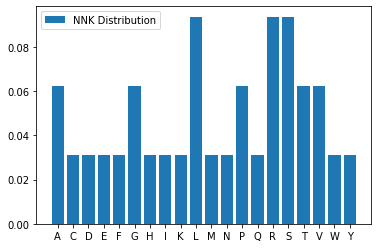

In [45]:
plt.bar(aa, nnk_percentages, label='NNK Distribution')
plt.legend()

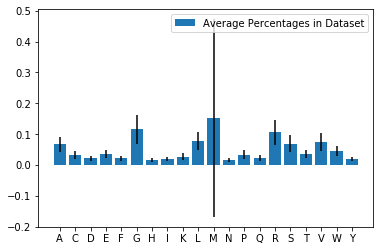

In [49]:
plt.bar(aa, actual_average_percentages, yerr=actual_std, label="Average Percentages in Dataset")
plt.legend()